In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [2]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

In [3]:
# dividing into numerical and categorical 
cat = train.select_dtypes(include=['object'])
num = train.select_dtypes(exclude=['object'])

In [4]:
train['participant2_influence'].describe()

count    9418.000000
mean        0.757421
std         0.355775
min         0.090910
25%         0.230770
50%         0.996450
75%         0.998660
max         0.999620
Name: participant2_influence, dtype: float64

In [5]:
train.columns

Index(['id', 'posted_time', 'updated_time', 'age', 'updated_age', 'app_type',
       'owner_id', 'owner_type', 'owner_influence', 'number_of_likes',
       'number_of_comments', 'reactivity', 'is_mentions_me',
       'is_mentions_connections', 'is_commented_by_me',
       'is_commented_by_connections', 'is_liked_by_me',
       'is_liked_by_connections', 'poster_id', 'poster_gender',
       'poster_is_employee', 'poster_is_lead', 'poster_is_in_connections',
       'poster_focus', 'poster_order', 'poster_influence', 'participant1_id',
       'participant1_action', 'participant1_gender',
       'participant1_is_employee', 'participant1_is_lead',
       'participant1_is_in_connections', 'participant1_focus',
       'participant1_order', 'participant1_influence', 'participant2_id',
       'participant2_action', 'participant2_gender',
       'participant2_is_employee', 'participant2_is_lead',
       'participant2_is_in_connections', 'participant2_focus',
       'participant2_order', 'partici

In [6]:
combinations = [ ('is_liked_by_connections', 'participant1_influence'),
                 ('participant1_influence', 'participant2_influence'),
                 ('participant2_influence', 'participant3_influence'), 
                 ('participant3_influence', 'participant4_influence'), 
                 ('participant4_influence', 'participant5_influence'),
                 ('participant4_influence', 'participant4_is_employee'),
                 ('is_commented_by_connections', 'number_of_comments'),
                 ('poster_influence', 'poster_is_employee'),
                 ('is_liked_by_connections', 'number_of_likes'),
                 ('number_of_likes', 'participant3_influence'), 
                 ('participant5_is_employee', 'participant5_influence'), 
                 ('reactivity', 'owner_influence')]

In [7]:
def plot_two(combination, ds):
    print('\n', combination)
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(ds[combination[0]])
    plt.grid()
    plt.subplot(1, 2, 2)
    sns.distplot(ds[combination[1]])
    plt.grid()
    plt.show()


 ('is_liked_by_connections', 'participant1_influence')


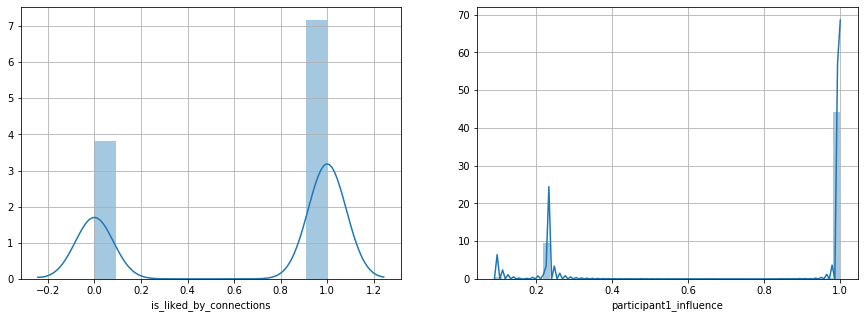


 ('participant1_influence', 'participant2_influence')


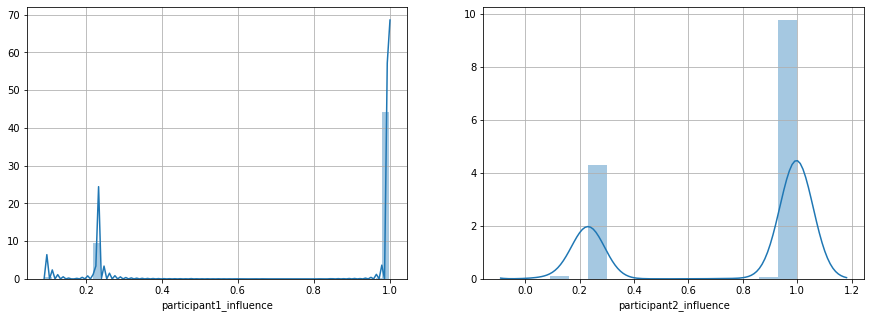


 ('participant2_influence', 'participant3_influence')


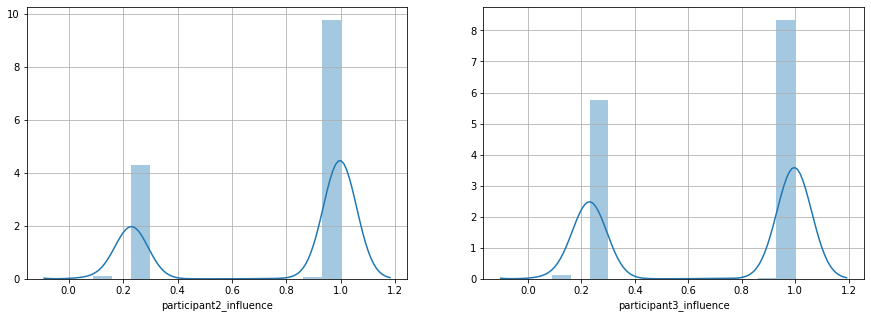


 ('participant3_influence', 'participant4_influence')


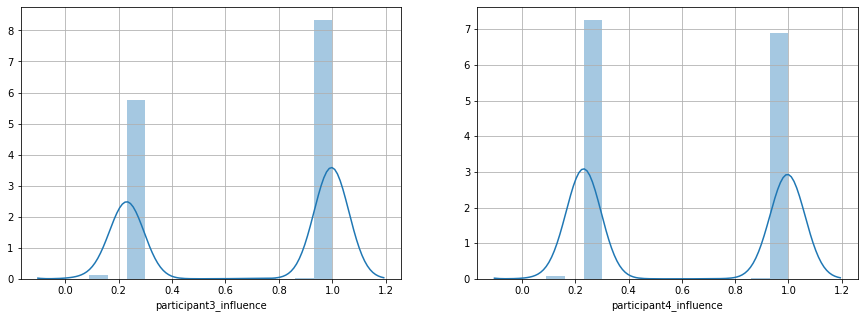


 ('participant4_influence', 'participant5_influence')


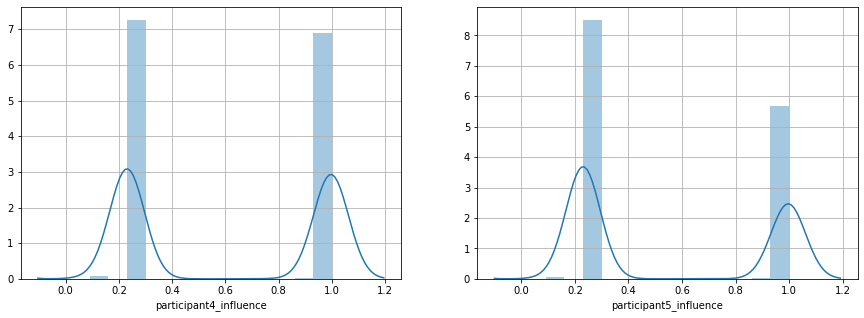


 ('participant4_influence', 'participant4_is_employee')


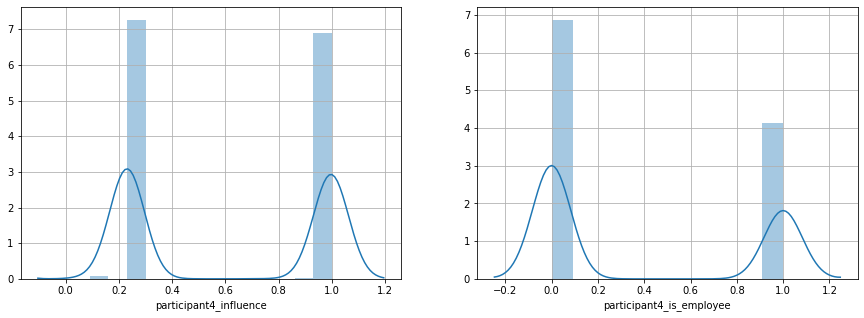


 ('is_commented_by_connections', 'number_of_comments')


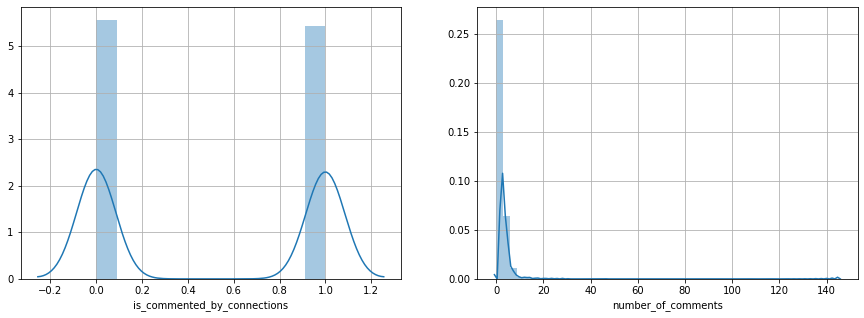


 ('poster_influence', 'poster_is_employee')


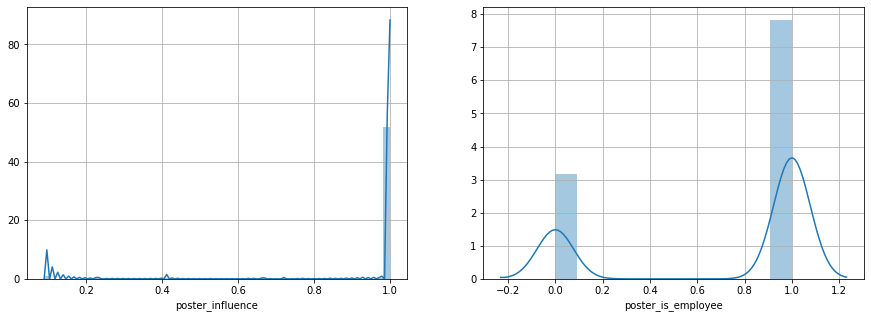


 ('is_liked_by_connections', 'number_of_likes')


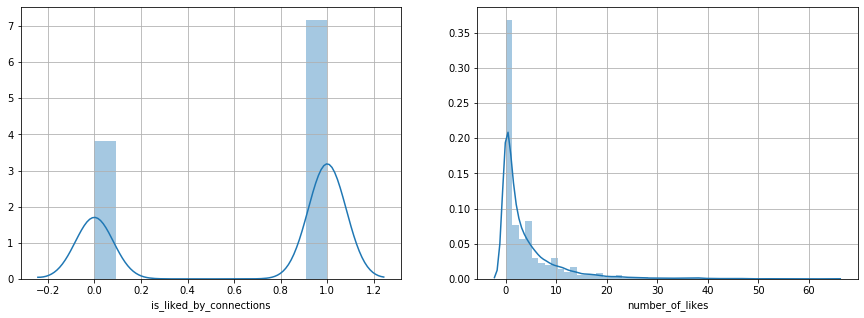


 ('number_of_likes', 'participant3_influence')


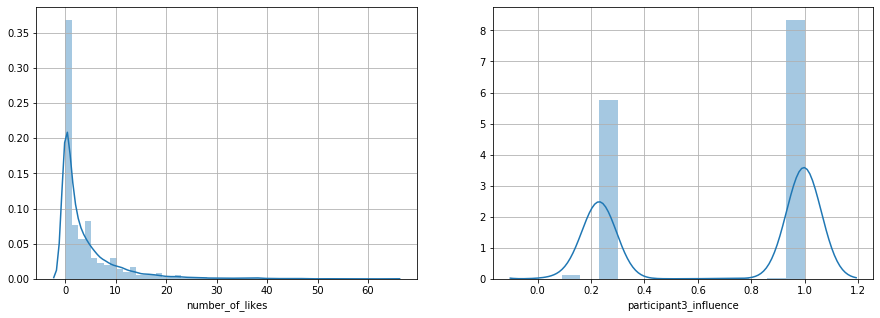


 ('participant5_is_employee', 'participant5_influence')


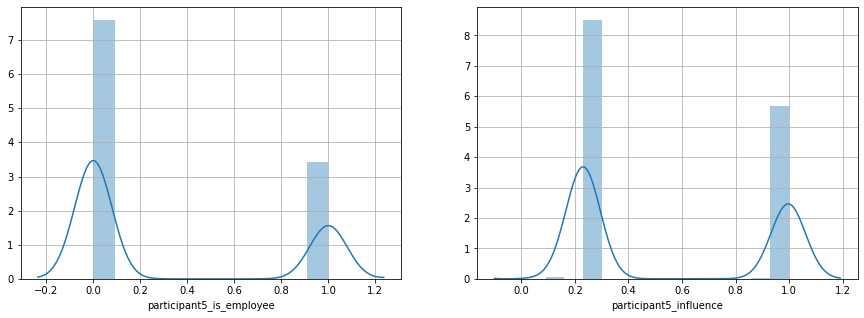


 ('reactivity', 'owner_influence')


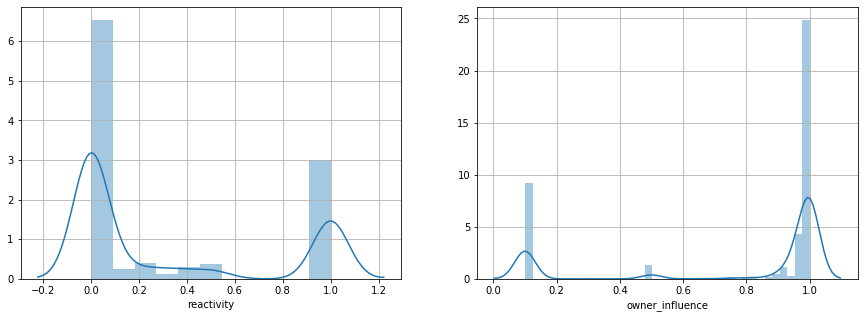

In [64]:
for combination in combinations:
    plot_two(combination, train)

### Statistical analysis
----------------------------
####  *  (__'is_liked_by_connections'__  and  __'participant1_influence'__)  --  V ( even better for 2-5 participants);
#### * (__'participantN_influence'__ and __'participant(N+1) influence'__)  -- V (for N = 1, 2, 3, 4) ;
#### * (__'participant4_influence'__ and __'participant4_is_employee'__)  --  V ( can try for other participants);
#### * (__'is_commented_by_connections'__ and '__number_of_comments'__) -- NO (completely different distributions)
#### * (__'poster_influence'__ and __'poster_is_employee'__) -- can try (but distribution of poster_influence is weird)
#### most of posters has 0.99 influence and are employees!
#### * (__'is_liked_by_connections'__ and __'number_of_likes'__) -- NO (except of number of likes will be converted or normalized (0.01 = 100) 
#### * (__'number_of_likes'__ and __'participant3_influence'__) -- NO (again if number_of_likes is converted)
#### * (__'participant5_is_employee'__ (0/1)  and  __'participant5_influence'__ (0-1)) -- V
#### * (__'reactivity'__ and __'owner_influence'__) -- ??? reactivity has a bit different distribution (plus no hands on it)

## Age digging

In [23]:
train.posted_time.describe()

count    9.418000e+03
mean     1.543272e+12
std      1.738320e+10
min      1.372140e+12
25%      1.530010e+12
50%      1.545060e+12
75%      1.556120e+12
max      1.573060e+12
Name: posted_time, dtype: float64

In [25]:
# 1 day = 86400000 ms
day = train.loc[(train['posted_time'] >= (1.573060e+12 - 86400000)) & (train['posted_time'] <= 1.573060e+12)]
day

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
9389,269081,1.572980e+12,1.572980e+12,4.229899e+09,4.229899e+09,wiki,57727,space,0.99973,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61524
9392,269104,1.573030e+12,1.573030e+12,4.176178e+09,4.176178e+09,other,78,user,0.99937,4,...,22636,viewed,male,0,0,1,other,1,0.23077,0.83005
9393,269114,1.573030e+12,1.573030e+12,4.174526e+09,4.174526e+09,other,3201,space,0.99992,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61414
9395,269169,1.573040e+12,1.573040e+12,4.166351e+09,4.166351e+09,other,40316,space,0.50000,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.49912
9396,269170,1.573040e+12,1.573040e+12,4.165615e+09,4.165615e+09,wiki,57727,space,0.99973,2,...,44661,viewed,male,0,0,1,other,1,0.23077,0.77739
9397,269105,1.573030e+12,1.573030e+12,4.176095e+09,4.176095e+09,other,120363,user,0.10000,17,...,78,liked,female,1,0,1,marketing,1,0.99808,0.84770
9402,269185,1.573050e+12,1.573050e+12,4.159206e+09,4.159206e+09,other,57727,space,0.99973,1,...,3089,viewed,male,0,0,1,other,1,0.23077,0.69655
9403,269200,1.573050e+12,1.573050e+12,4.155091e+09,4.155091e+09,other,9037,space,0.99949,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61457
9404,269202,1.573050e+12,1.573050e+12,4.154930e+09,4.154930e+09,other,123797,user,0.10000,4,...,22636,viewed,male,0,0,1,other,1,0.23077,0.83812
9405,269203,1.573050e+12,1.573050e+12,4.154919e+09,4.154919e+09,other,99314,user,0.10000,3,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.81756


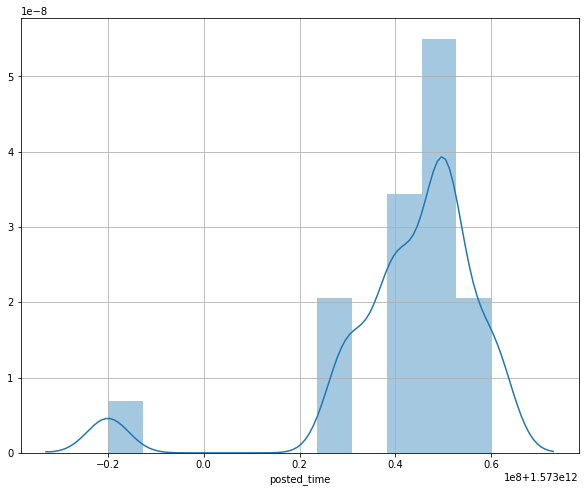

In [27]:
plt.figure(figsize=(10, 8))
sns.distplot(day['posted_time'])
plt.grid()

### In the end of the day there is more news than at the beginning?

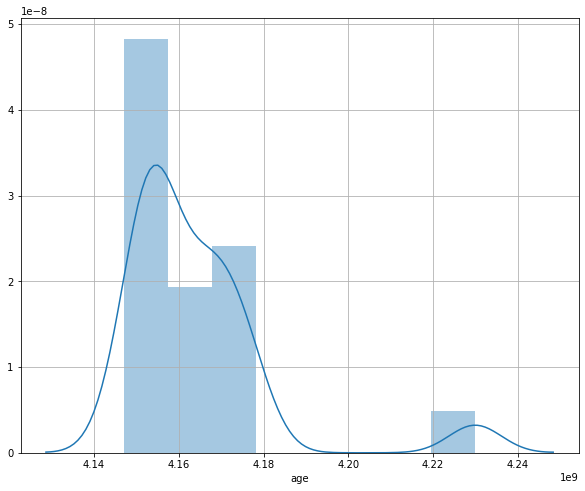

In [28]:
plt.figure(figsize=(10, 8))
sns.distplot(day['age'])
plt.grid()

In [37]:
# 1 week = 604800000 ms
week = train.loc[(train['posted_time'] >= (1.5727e+12 - 604800000)) & (train['posted_time'] <= 1.5727e+12)]
week 

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
9278,267947,1.572100e+12,1.572100e+12,5.108742e+09,5.108692e+09,other,57727,space,0.99973,17,...,14,liked,male,1,0,0,engineering,1,0.09091,0.84882
9280,267981,1.572260e+12,1.572260e+12,4.951199e+09,4.951069e+09,other,27310,space,0.99980,3,...,22636,viewed,male,0,0,1,other,1,0.23077,0.83856
9282,267988,1.572260e+12,1.572260e+12,4.950771e+09,4.950771e+09,other,122531,user,0.10000,8,...,123797,liked,female,1,0,1,other,1,0.99586,0.85437
9283,268014,1.572270e+12,1.572270e+12,4.938944e+09,4.938944e+09,calendar,13853,space,0.10000,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.49858
9284,268015,1.572270e+12,1.572270e+12,4.938775e+09,4.938775e+09,calendar,13853,space,0.10000,0,...,3089,viewed,male,0,0,1,other,1,0.23077,0.72134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9356,268700,1.572620e+12,1.572630e+12,4.582463e+09,4.580267e+09,other,57727,space,0.99973,20,...,123797,liked,female,1,0,1,other,1,0.99586,0.85488
9359,268702,1.572620e+12,1.572620e+12,4.582286e+09,4.582286e+09,other,20,user,0.10000,20,...,125983,liked,male,1,0,0,other,1,0.96169,0.87117
9366,268434,1.572520e+12,1.572520e+12,4.688891e+09,4.688891e+09,other,3201,space,0.99992,38,...,114145,commented,male,1,0,1,marketing,1,0.99842,0.87617
9383,268634,1.572620e+12,1.572620e+12,4.588385e+09,4.588385e+09,other,3201,space,0.99992,38,...,120363,commented,female,1,0,0,other,1,0.99480,0.87492


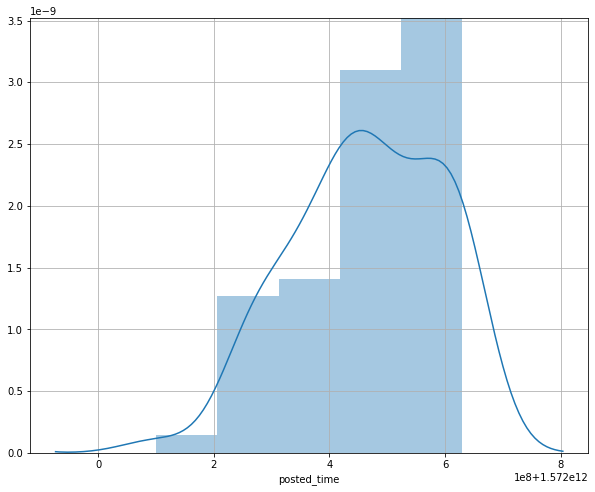

In [38]:
plt.figure(figsize=(10, 8))
sns.distplot(week['posted_time'])
plt.grid()

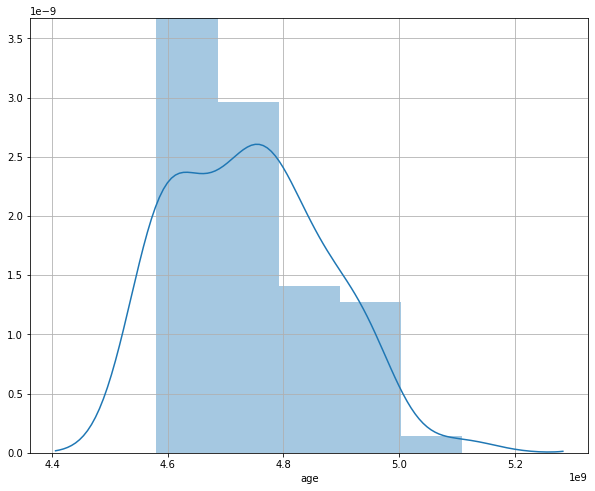

In [39]:
plt.figure(figsize=(10, 8))
sns.distplot(week['age'])
plt.grid()

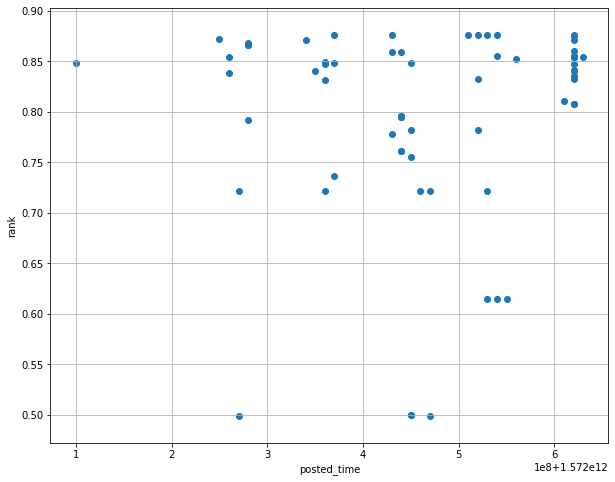

In [40]:
# scatter plot for week
plt.figure(figsize = (10,8))
plt.scatter(week['posted_time'], week['rank'])
plt.xlabel('posted_time')
plt.ylabel('rank')
plt.grid()
plt.show()

### Here at the begining we probably see weekend days, cause after these 5 work days (=5 cells) where most news is, there is also such an empty period.

In [41]:
# 1 month = 2592000000 ms
month = train.loc[(train['posted_time'] >= (1.5727e+12 - 2592000000)) & (train['posted_time'] <= 1.5727e+12)]
month

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
8977,264793,1.570110e+12,1.570110e+12,7.099897e+09,7.099897e+09,other,3201,space,0.99992,33,...,41,liked,male,1,0,1,sales,1,0.99828,0.86824
8981,264804,1.570110e+12,1.570110e+12,7.097536e+09,7.097536e+09,other,17,user,0.92308,9,...,126271,liked,male,0,0,0,other,1,0.89130,0.85911
8982,264823,1.570110e+12,1.570110e+12,7.095545e+09,7.095545e+09,other,17,user,0.92308,11,...,11,liked,male,1,0,1,marketing,1,0.99866,0.85885
8984,264841,1.570110e+12,1.570110e+12,7.094101e+09,7.094101e+09,other,123068,user,0.10000,14,...,126985,liked,male,0,0,1,other,1,0.99466,0.84043
8986,264847,1.570110e+12,1.570110e+12,7.092011e+09,7.092011e+09,other,124732,user,0.93939,15,...,11,liked,male,1,0,1,marketing,1,0.99866,0.87152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,267693,1.571940e+12,1.571940e+12,5.267279e+09,5.267279e+09,forum,111913,space,0.99977,0,...,44661,viewed,male,0,0,1,other,1,0.23077,0.78232
9366,268434,1.572520e+12,1.572520e+12,4.688891e+09,4.688891e+09,other,3201,space,0.99992,38,...,114145,commented,male,1,0,1,marketing,1,0.99842,0.87617
9383,268634,1.572620e+12,1.572620e+12,4.588385e+09,4.588385e+09,other,3201,space,0.99992,38,...,120363,commented,female,1,0,0,other,1,0.99480,0.87492
9385,266222,1.571070e+12,1.571070e+12,6.137803e+09,6.137738e+09,other,27310,space,0.99980,4,...,114145,liked,male,1,0,1,marketing,1,0.99842,0.86649


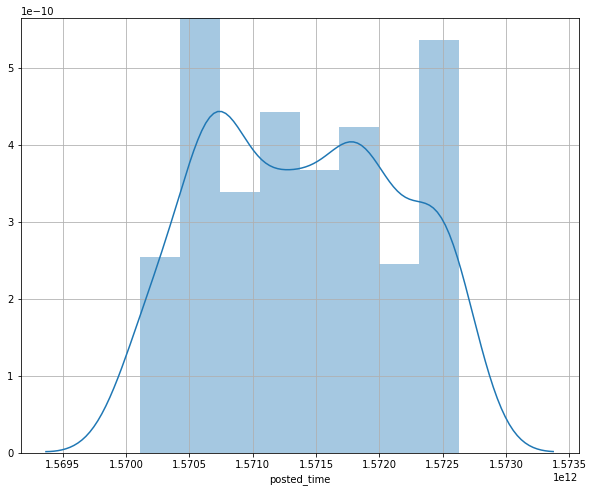

In [42]:
plt.figure(figsize=(10, 8))
sns.distplot(month['posted_time'])
plt.grid()

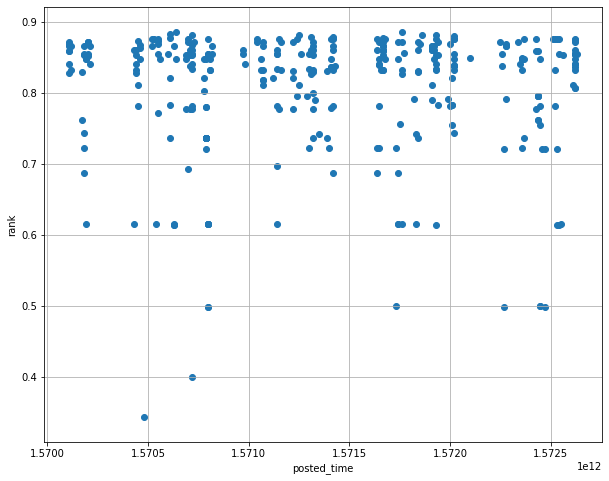

In [43]:
# scatter plot for month
plt.figure(figsize = (10,8))
plt.scatter(month['posted_time'], month['rank'])
plt.xlabel('posted_time')
plt.ylabel('rank')
plt.grid()
plt.show()

In [44]:
# 1 quartile = 7862400000 ms
quartile = train.loc[(train['posted_time'] >= (1.5727e+12 - 7862400000)) & (train['posted_time'] <= 1.5727e+12)]
quartile

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
8267,258384,1.564990e+12,1.564990e+12,1.221482e+10,1.221482e+10,other,75,user,0.97462,11,...,120732,liked,female,1,0,1,engineering,1,0.99613,0.85463
8269,258404,1.565000e+12,1.565000e+12,1.220990e+10,1.220990e+10,other,4882,space,0.91736,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.49973
8270,258414,1.565000e+12,1.565000e+12,1.220810e+10,1.220810e+10,other,120732,user,0.10000,9,...,122534,liked,male,1,0,1,marketing,1,0.99678,0.86620
8271,258430,1.565000e+12,1.565000e+12,1.220481e+10,1.220481e+10,other,75,user,0.97462,9,...,11,liked,male,1,0,1,marketing,1,0.99866,0.83275
8272,258471,1.565010e+12,1.565010e+12,1.219196e+10,1.219196e+10,other,57727,space,0.99973,4,...,22636,viewed,male,0,0,1,other,1,0.23077,0.82956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,261690,1.568020e+12,1.568020e+12,9.187732e+09,9.187732e+09,other,27310,space,0.99980,1,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.82744
9382,260056,1.566400e+12,1.566400e+12,1.080276e+10,1.080276e+10,forum,111913,space,0.99977,2,...,13,commented,male,1,0,1,marketing,1,0.99895,0.87614
9383,268634,1.572620e+12,1.572620e+12,4.588385e+09,4.588385e+09,other,3201,space,0.99992,38,...,120363,commented,female,1,0,0,other,1,0.99480,0.87492
9385,266222,1.571070e+12,1.571070e+12,6.137803e+09,6.137738e+09,other,27310,space,0.99980,4,...,114145,liked,male,1,0,1,marketing,1,0.99842,0.86649


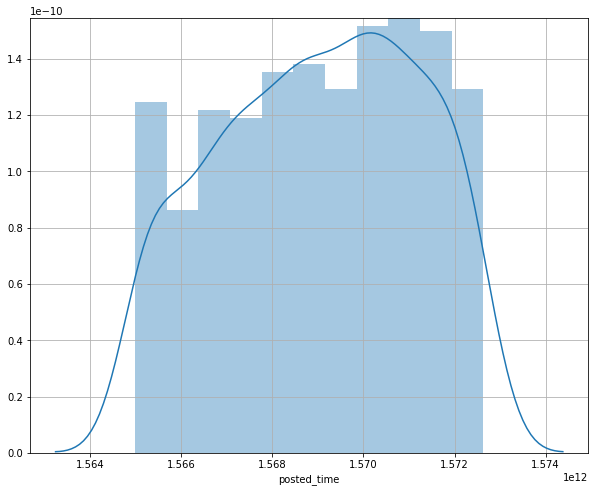

In [46]:
plt.figure(figsize=(10, 8))
sns.distplot(quartile['posted_time'])
plt.grid()

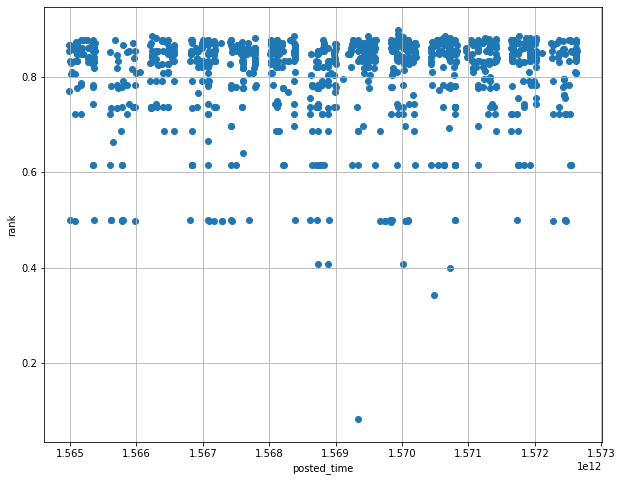

In [47]:
# scatter plot for quartile
plt.figure(figsize = (10,8))
plt.scatter(quartile['posted_time'], quartile['rank'])
plt.xlabel('posted_time')
plt.ylabel('rank')
plt.grid()
plt.show()

In [48]:
# 1 year =  31536000000 ms
year = train.loc[(train['posted_time'] >= (1.5727e+12 - 31536000000)) & (train['posted_time'] <= 1.5727e+12)]
year

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
3852,213289,1.541170e+12,1.541170e+12,3.604041e+10,3.604041e+10,other,57727,space,0.99973,1,...,3089,viewed,male,0,0,1,other,1,0.23077,0.73672
3853,213290,1.541170e+12,1.541440e+12,3.604029e+10,3.577071e+10,other,3627,space,0.95745,7,...,107711,liked,female,0,0,0,marketing,1,0.99332,0.87128
3854,213301,1.541170e+12,1.541170e+12,3.603815e+10,3.603162e+10,other,78,user,0.99937,8,...,114145,commented,male,1,0,1,marketing,1,0.99842,0.87623
3855,213315,1.541170e+12,1.542300e+12,3.603465e+10,3.490764e+10,other,9037,space,0.99949,0,...,3089,viewed,male,0,0,1,other,1,0.23077,0.72172
3856,213325,1.541170e+12,1.541940e+12,3.603192e+10,3.526681e+10,other,114193,space,0.95633,1,...,44661,viewed,male,0,0,1,other,1,0.23077,0.79152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,243004,1.556090e+12,1.556090e+12,2.111595e+10,2.111595e+10,wiki,57727,space,0.99973,2,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.81791
9399,242765,1.556000e+12,1.556000e+12,2.120407e+10,2.120407e+10,wiki,57727,space,0.99973,2,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.81790
9400,243200,1.556180e+12,1.556180e+12,2.103053e+10,2.103053e+10,wiki,57727,space,0.99973,2,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.81791
9401,243127,1.556120e+12,1.556120e+12,2.109029e+10,2.109029e+10,wiki,57727,space,0.99973,8,...,6,liked,male,1,0,1,marketing,1,0.99772,0.86657


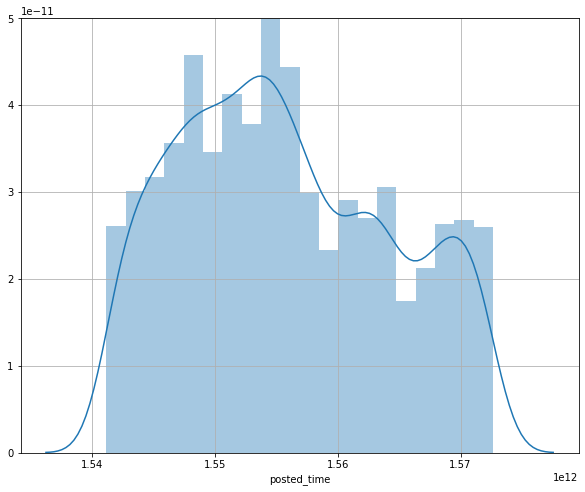

In [49]:
plt.figure(figsize=(10, 8))
sns.distplot(year['posted_time'])
plt.grid()